For this demonstration we will be simulating a SrTiO3 CeO2 interface downloaded from https://www.materialscloud.org/explore/stoceriaitf/grid/calculations.

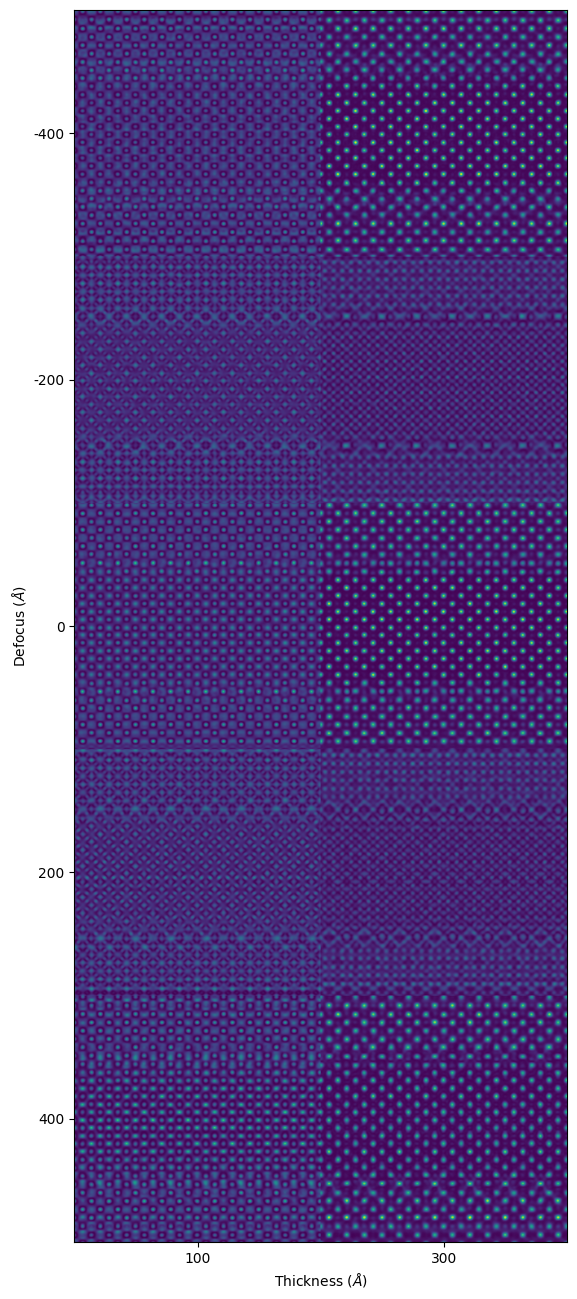

In [2]:
import pyms
import numpy as np
import torch

# Get crystal
crystal = pyms.structure.fromfile(
    "Structures/SrTiO3_CeO2_interface.xyz", atomic_coordinates="cartesian"
)

# A few maniupulations to remove vaccuum at edges and create a psuedo-periodic
# structure
crystal = crystal.resize([0.1, 0.76], axis=0)
from copy import deepcopy

other = deepcopy(crystal).resize([0.017, 0.99], axis=0)
other.reflect([0])
crystal = crystal.concatenate(other, axis=0)

# Output structure for examination in Vesta
# crystal.output_vesta_xtl("manipulated.xtl")

# Quick plot of crystal
# crystal.quickplot(atomscale=1e-5)

# Subslicing of crystal for multislice
subslices = [0.33, 0.66, 1.0]

# Grid size in pixels
gridshape = [1024, 1024]

# Tile structure in multislice for a square grid
tiling = [1, 7]

# Probe accelerating voltage in eV
eV = 3e5

# Objective aperture in mrad
app = 15

# No aperture is also an option
# app = None

# Set up series of thicknesses
thicknesses = np.arange(100, 301, 200)

# Set up  series of defocii
df = np.arange(-400, 401, 200)

# Number of frozen phonon passes
nfph = 25

output = pyms.HRTEM(
    crystal,
    gridshape,
    eV,
    app,
    thicknesses,
    subslices=subslices,
    df=df,
    tiling=tiling,
    nfph=25,
    showProgress=False
)

import matplotlib.pyplot as plt
%matplotlib inline
ny,nx = output.shape[-2:]
# Plot images
fig, ax = plt.subplots(figsize=(16,16))
ax.set_xticks(np.arange(nx/2,(len(thicknesses)+0.5)*nx,nx))
ax.set_xticklabels(thicknesses)
ax.set_xlabel('Thickness ($\AA$)')
ax.set_yticks(np.arange(ny/2,(len(df)+0.5)*ny,ny))
ax.set_yticklabels(df)
ax.set_ylabel('Defocus ($\AA$)')

# Stack defocii (first dimension of output) and thicknesses (second dimension of output)
# to make a thickness defocus series
ax.imshow(np.hstack(np.hstack(output)))

